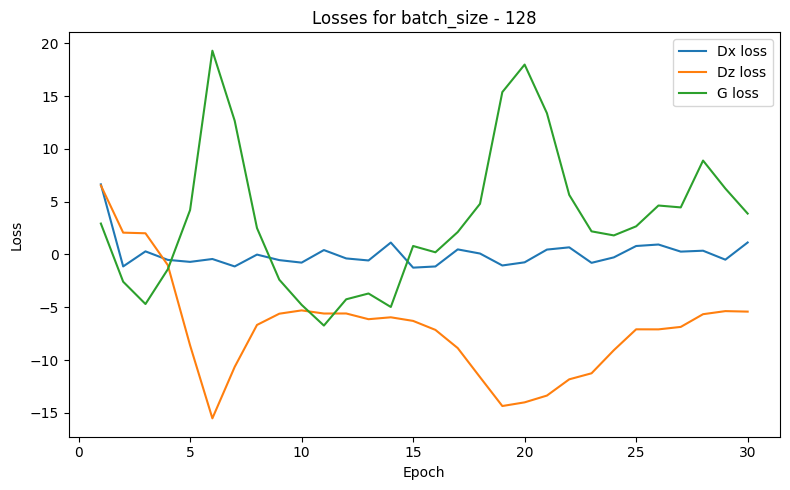

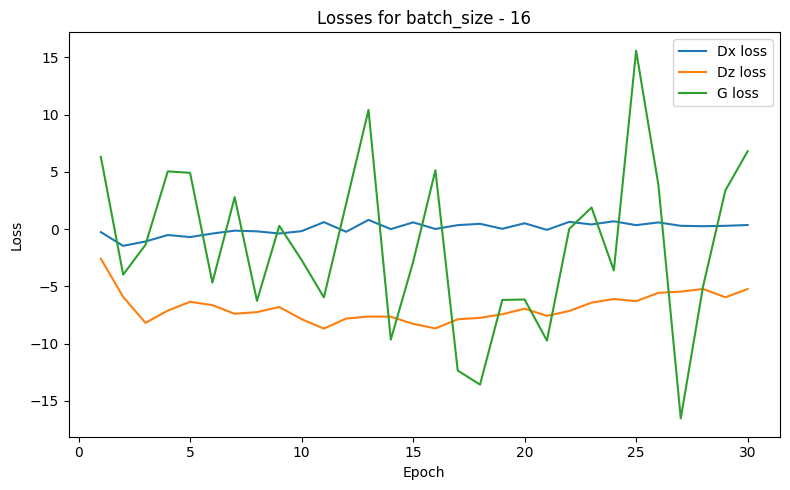

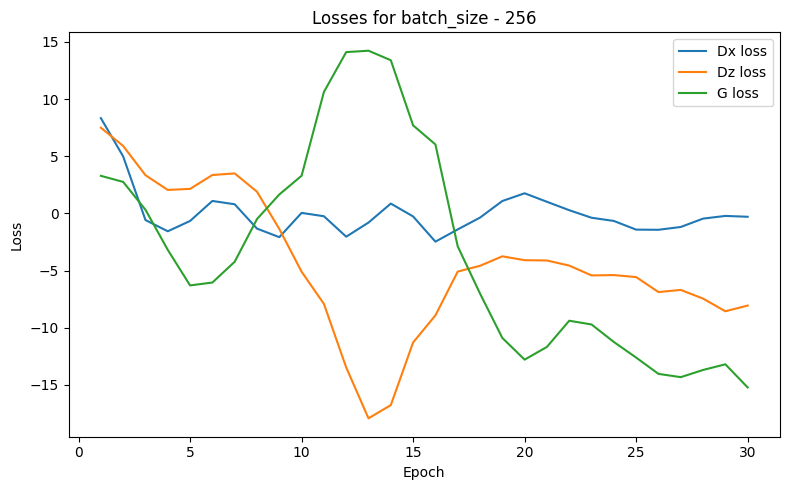

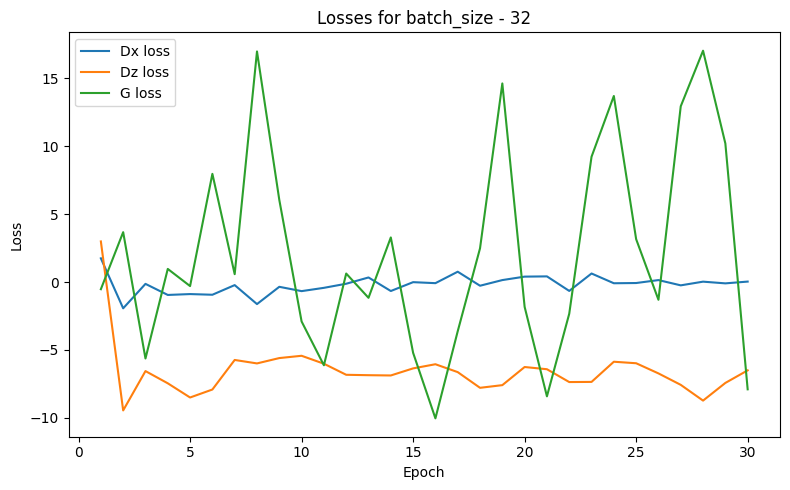

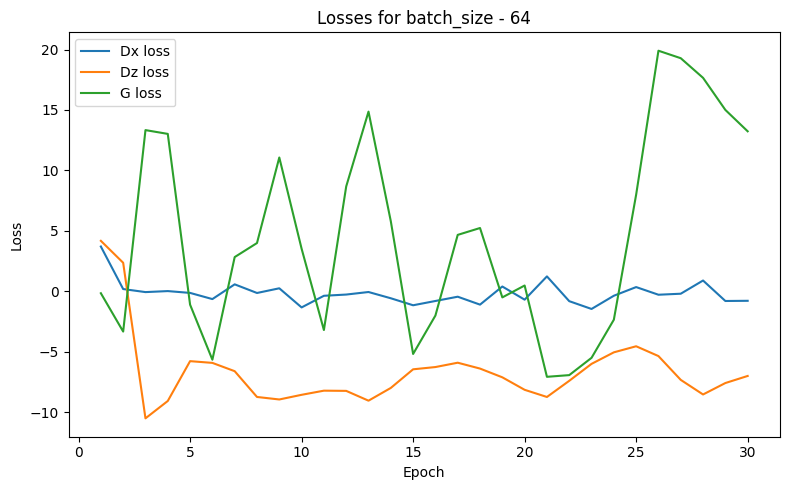

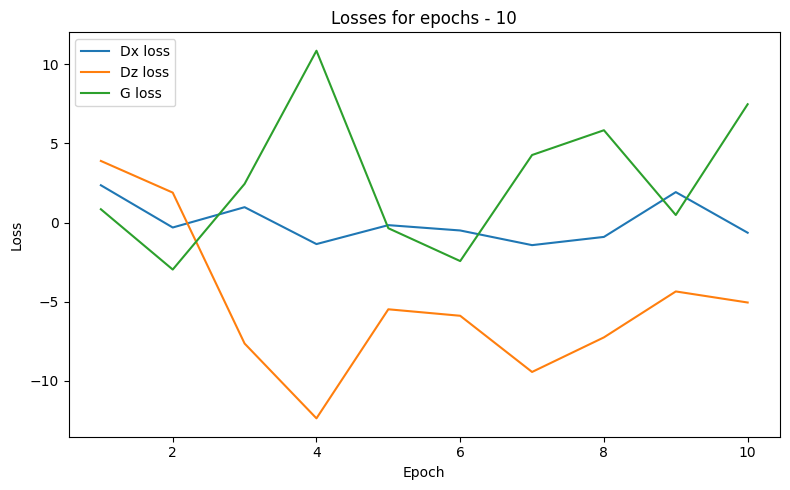

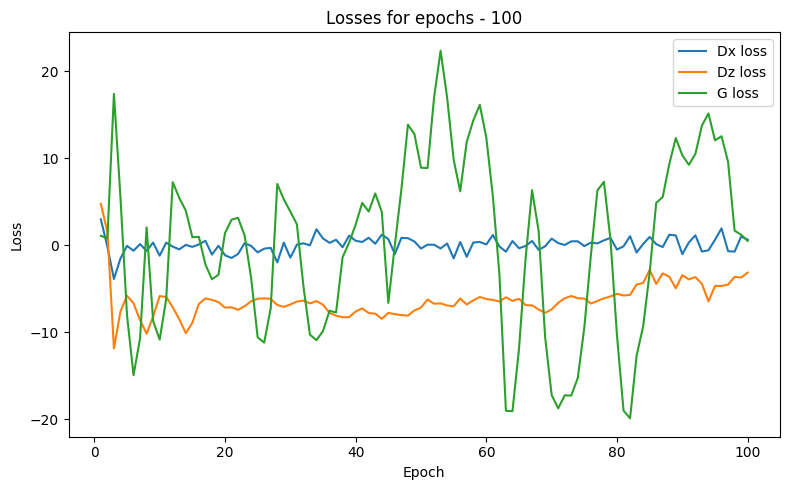

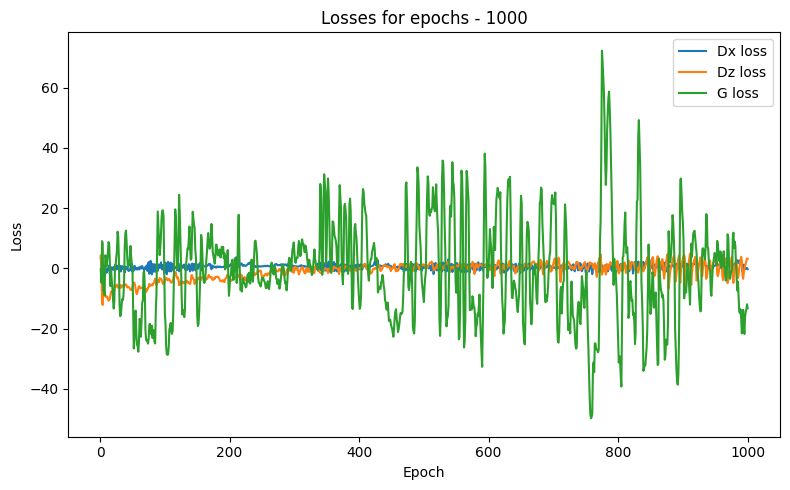

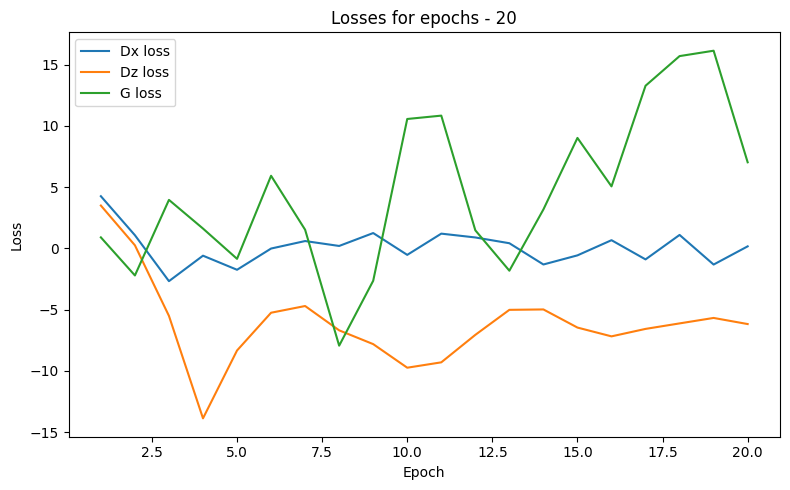

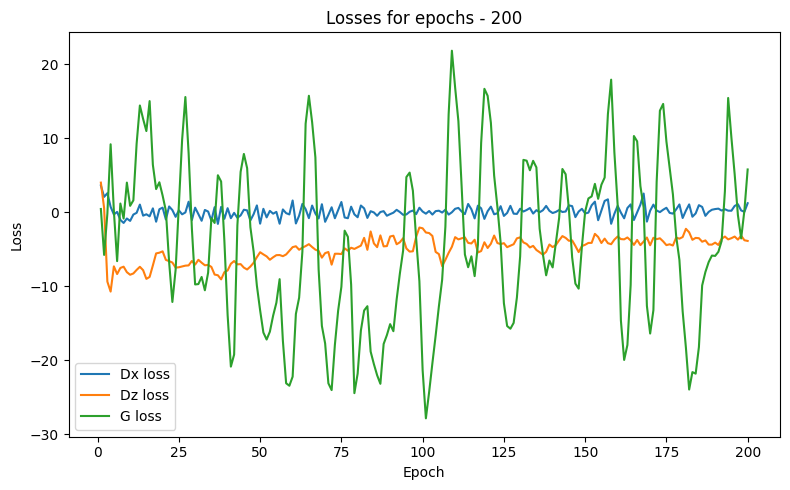

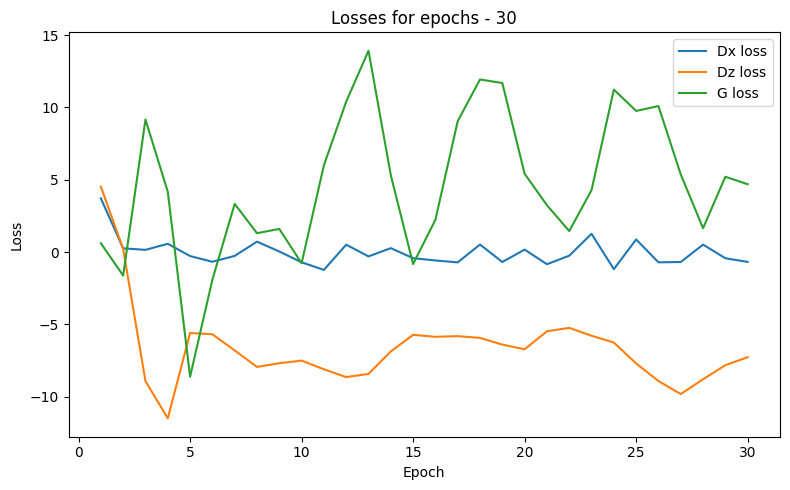

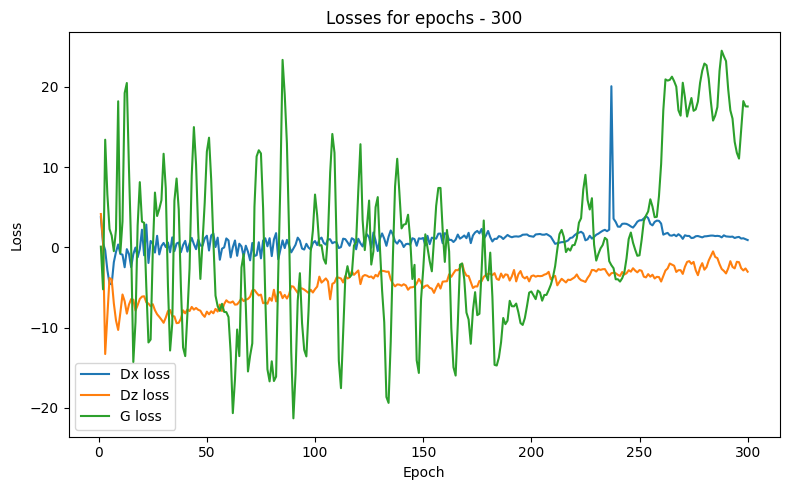

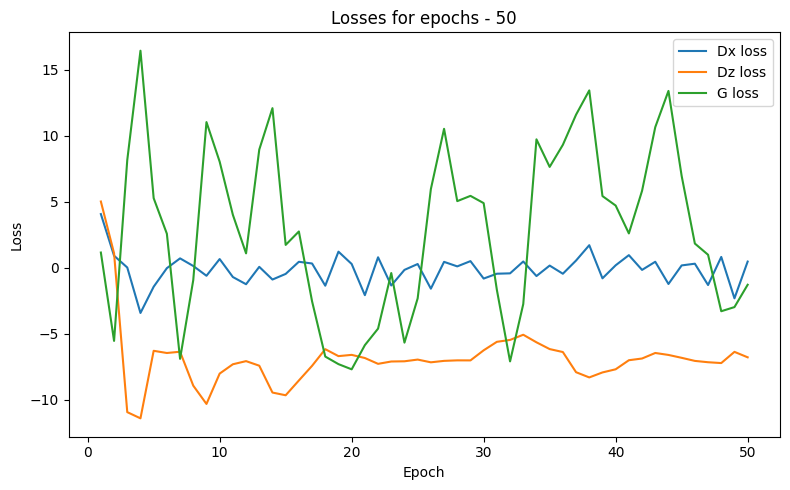

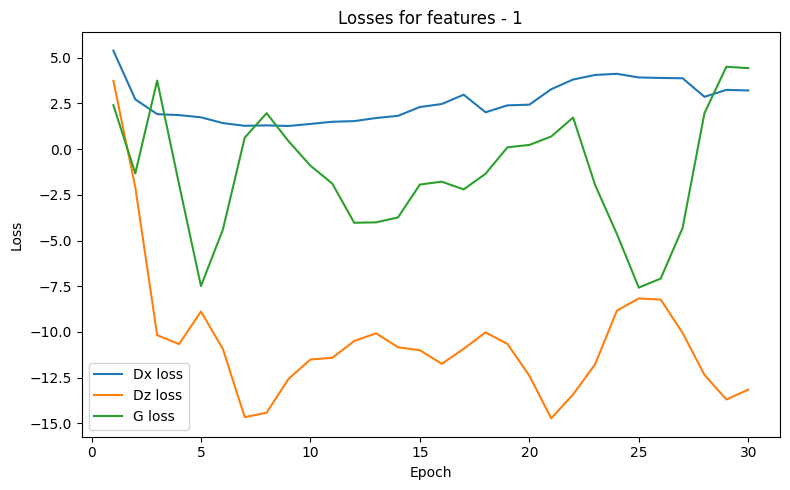

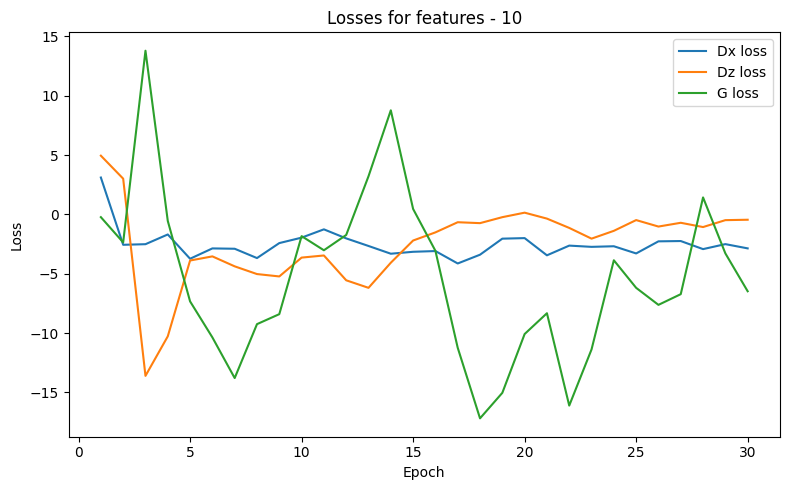

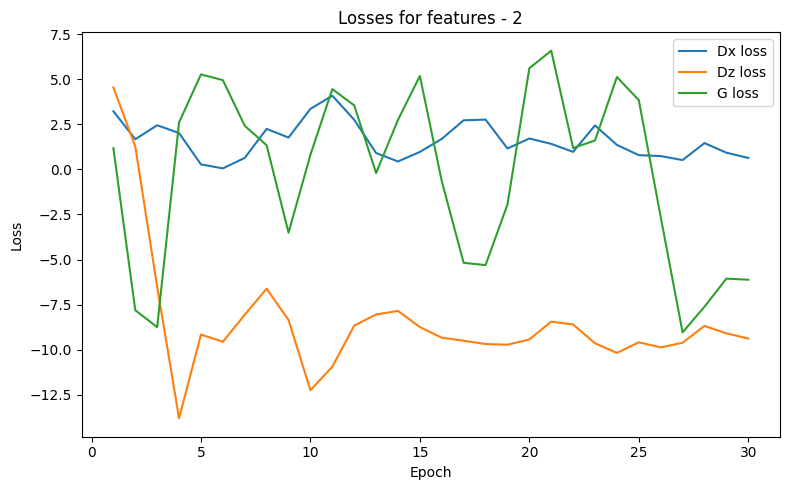

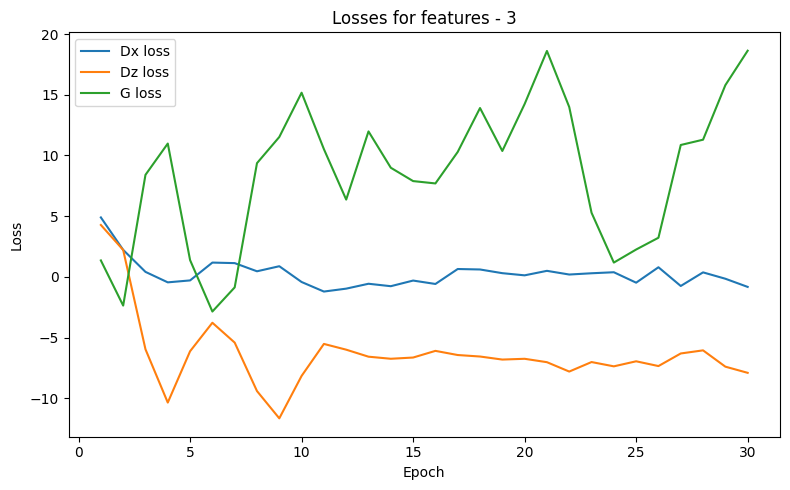

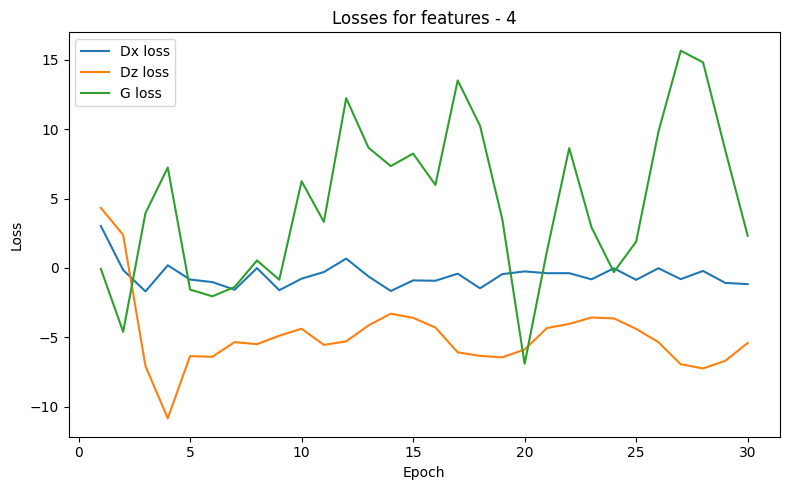

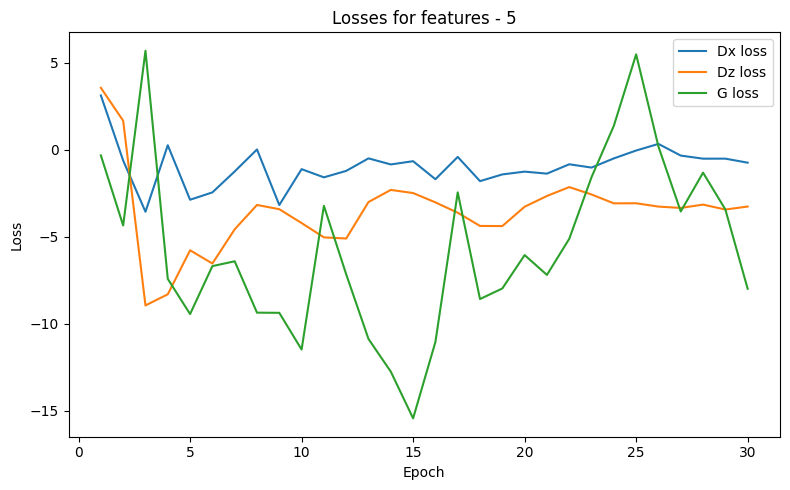

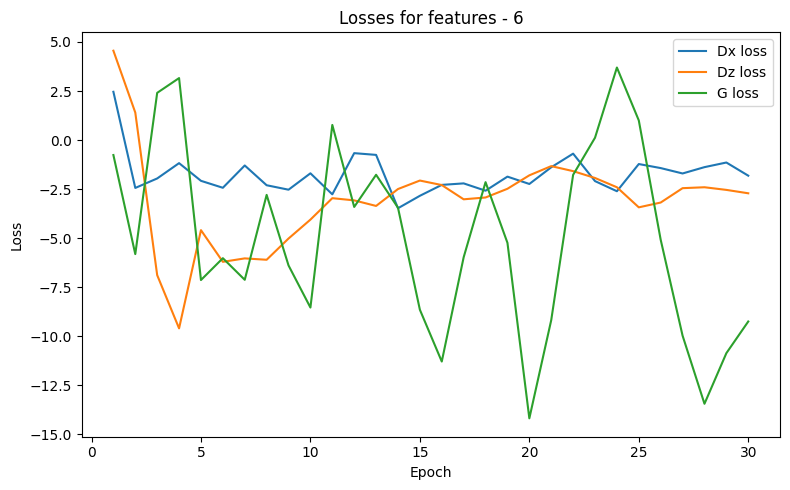

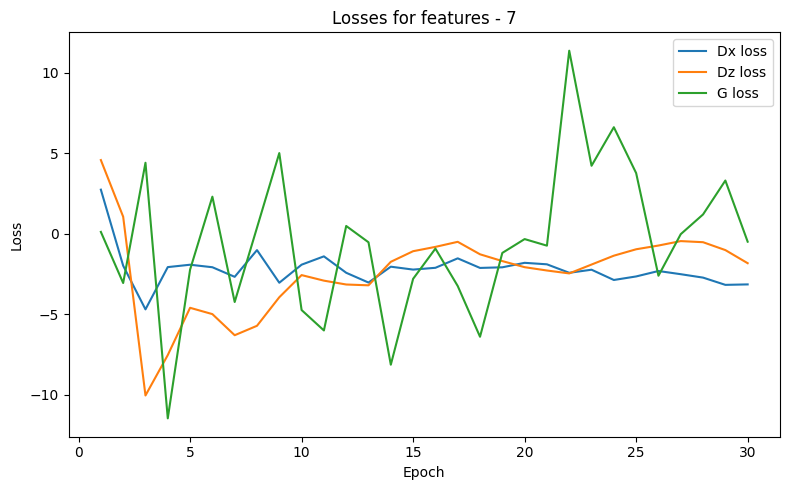

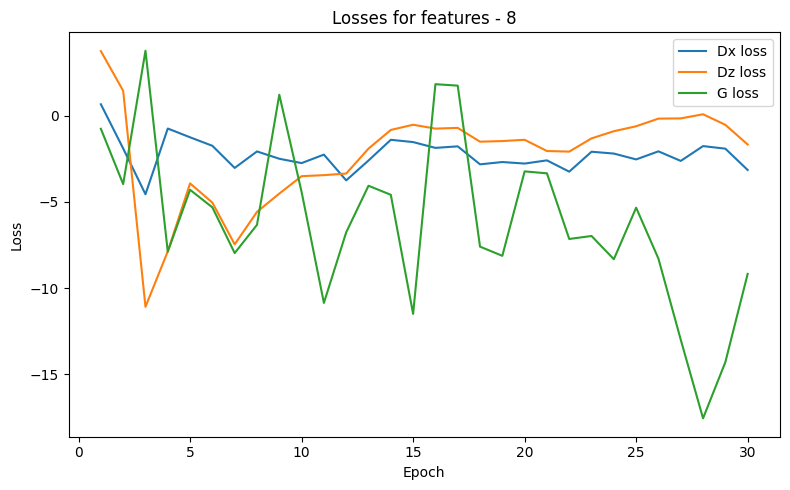

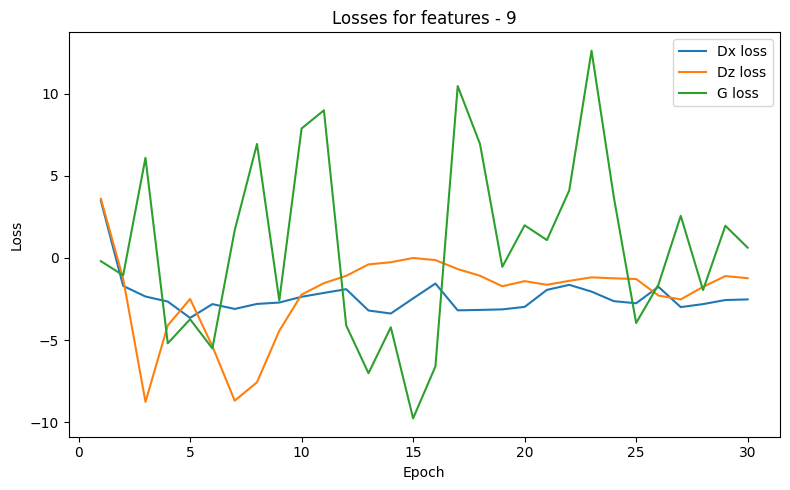

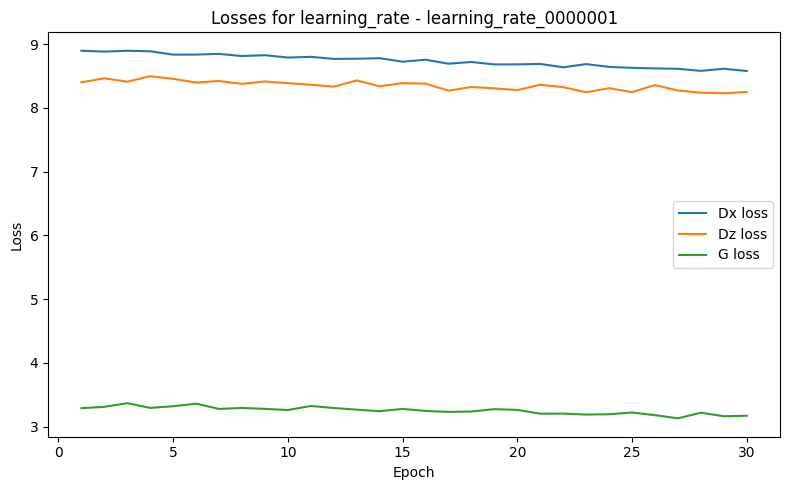

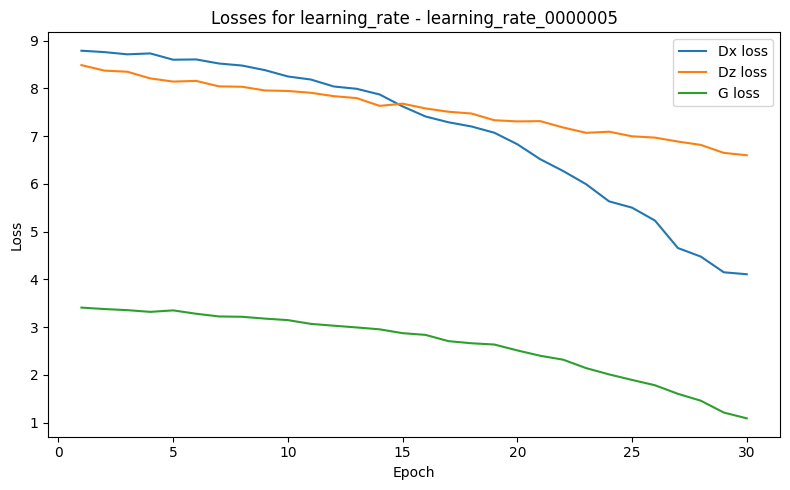

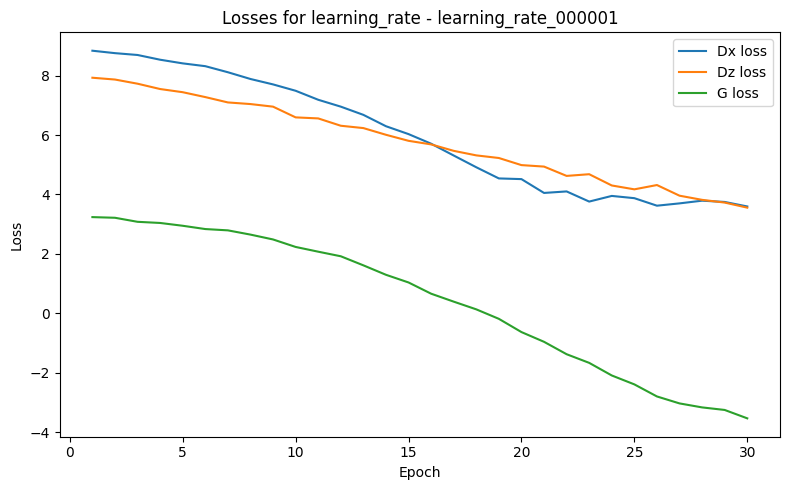

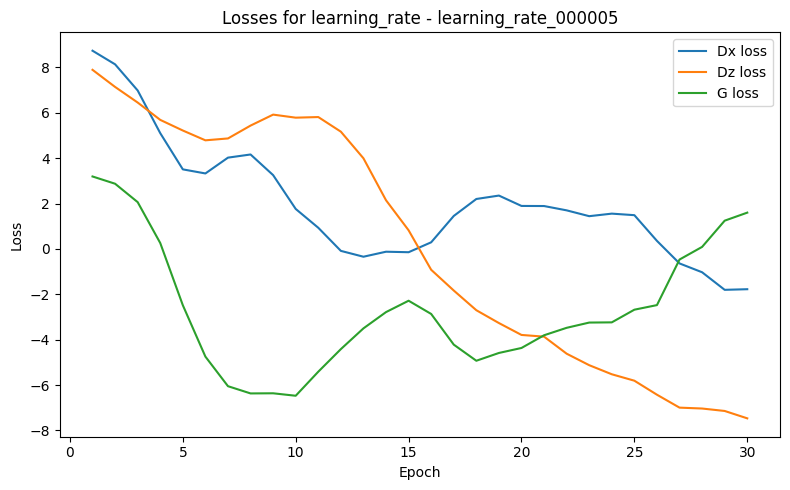

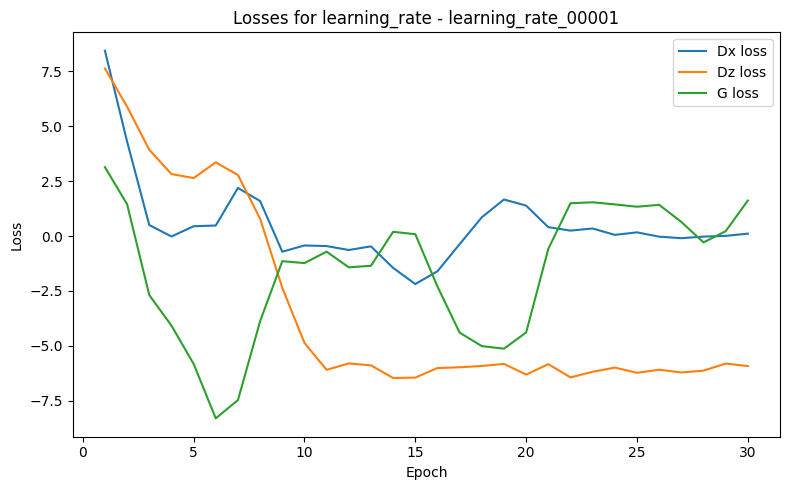

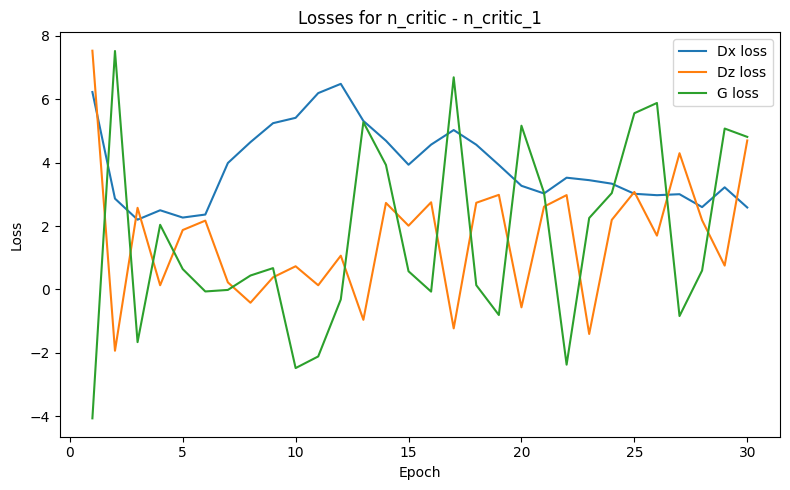

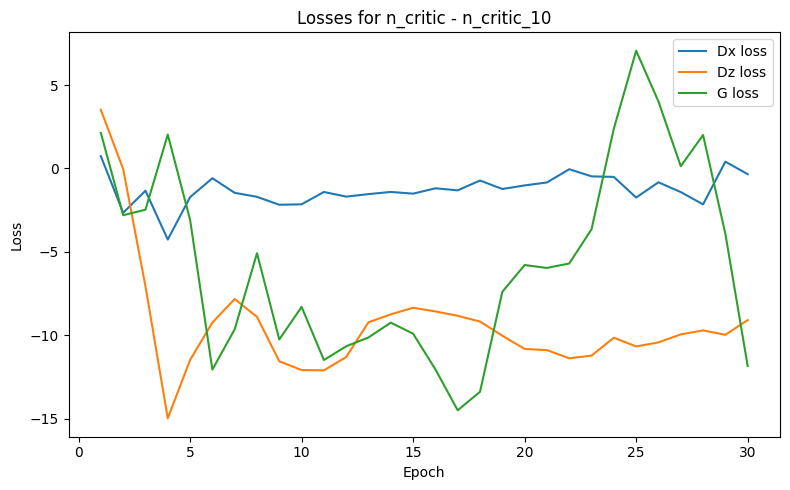

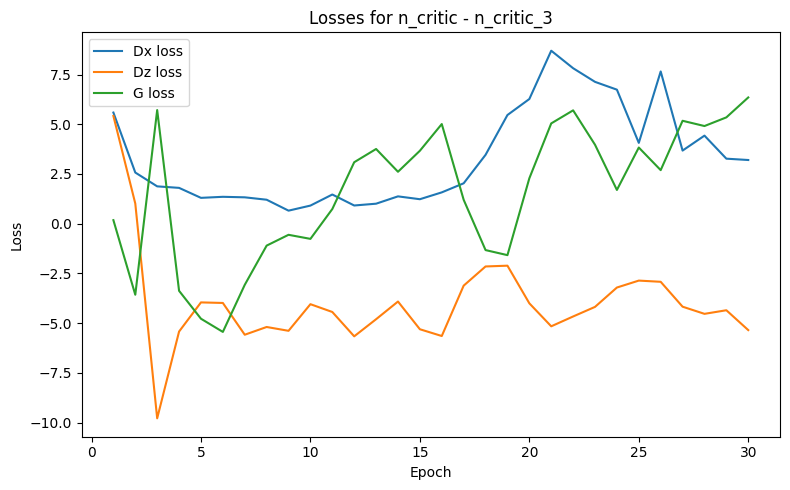

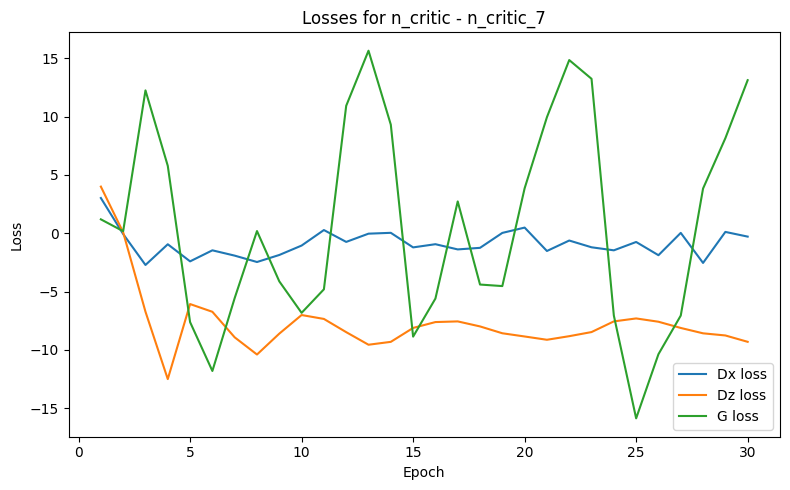

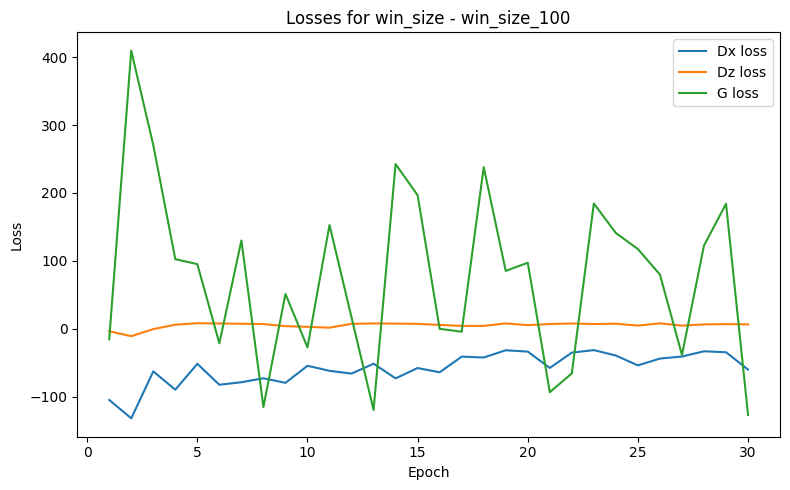

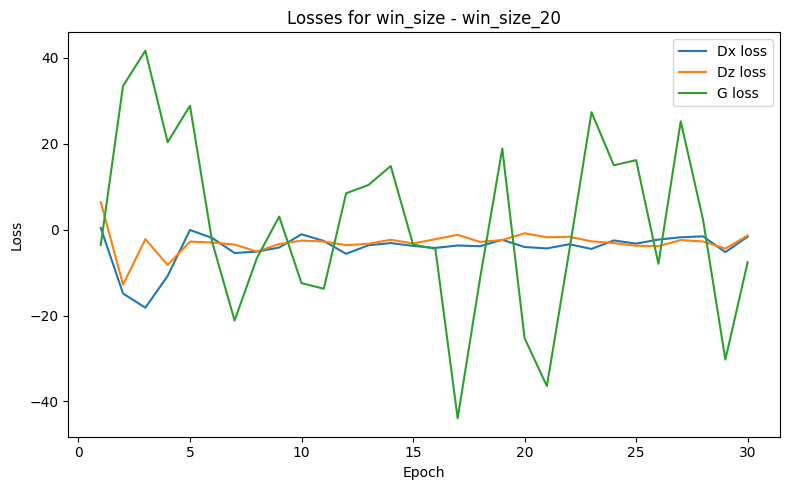

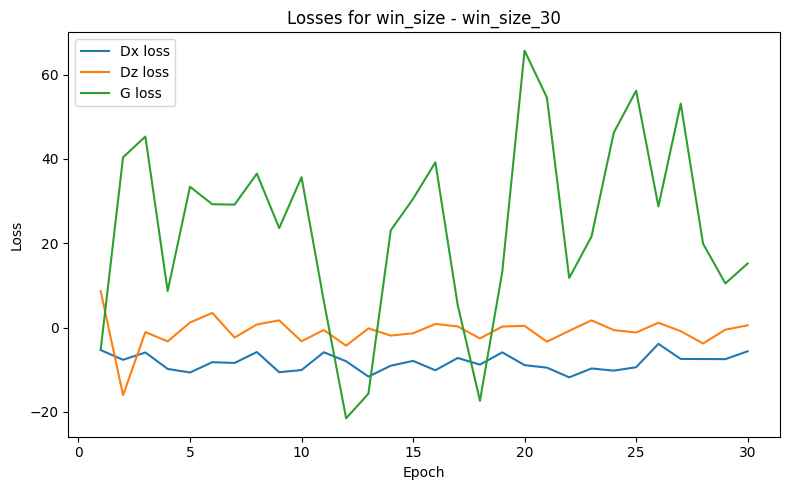

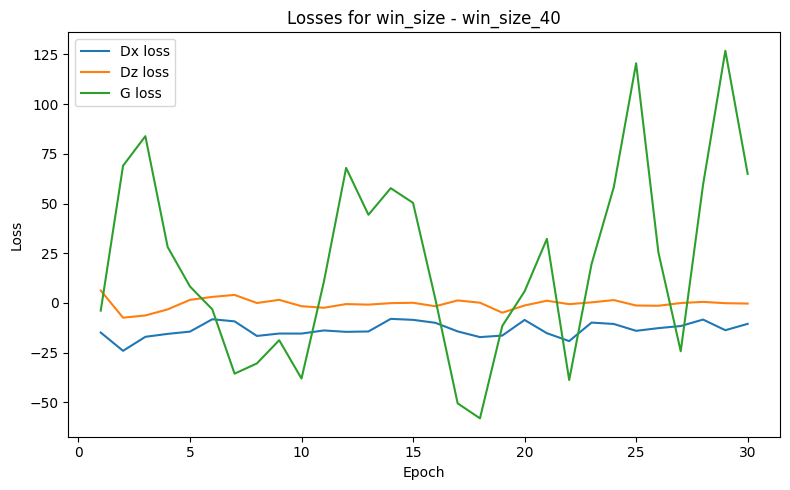

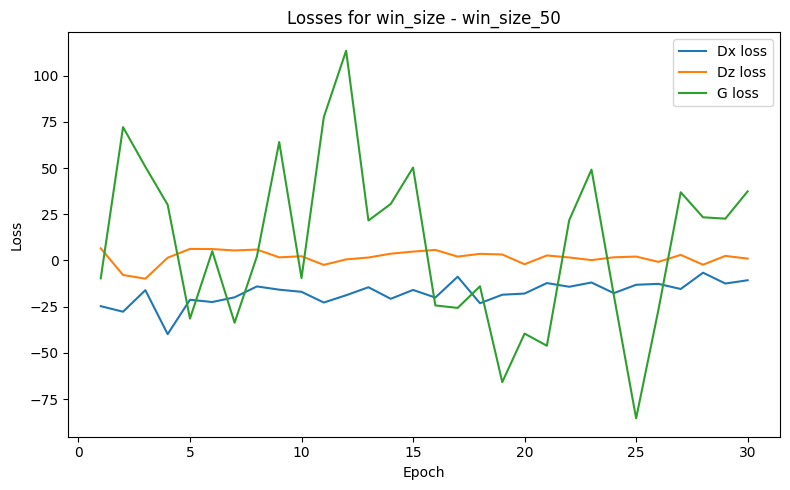

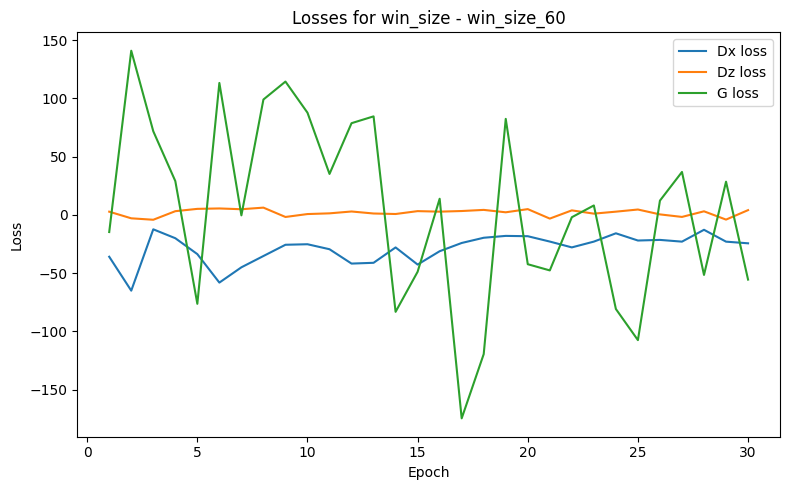

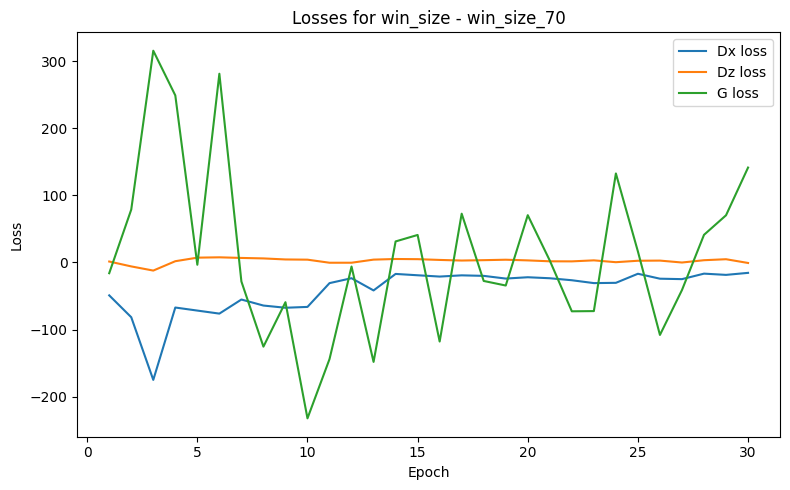

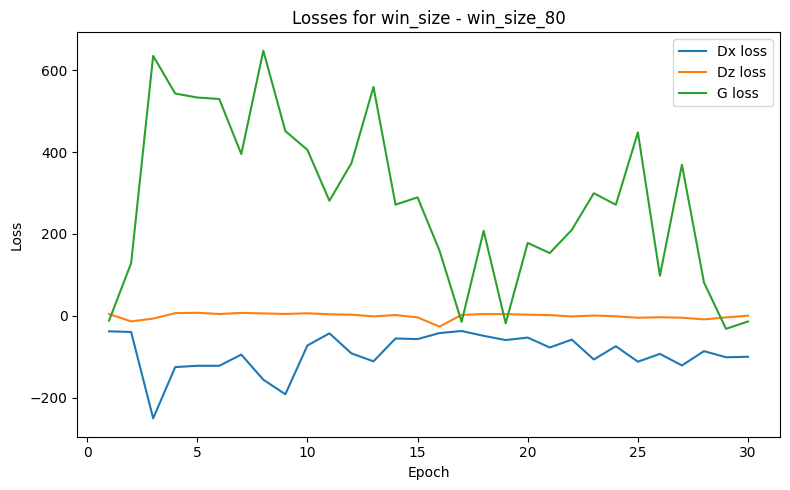

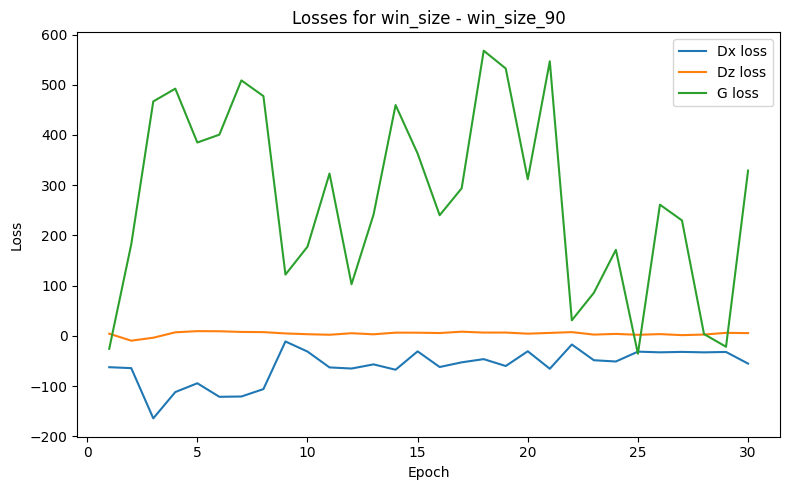

In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# 기본 디렉토리 경로
base_directory = "C:/Users/SSAFY/Desktop/Battery/Code_Study/Week_5/"

# 각 폴더 이름
folders = ["batch_size", "epochs", "features", "learning_rate", "n_critic", "win_size"]

# 폴더 내의 파일을 읽어서 처리
for folder in folders:
    folder_path = os.path.join(base_directory, folder)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            if filename.endswith(".txt"):
                filenames = filename.split('.') # 파일 이름에서 레이블 추출
                label = filenames[0]
                if len(filenames) == 3:
                    label += filenames[1]
                
                file_path = os.path.join(folder_path, filename)
                data = {'Epoch': [], 'Dx_loss': [], 'Dz_loss': [], 'G_loss': []}
                
                with open(file_path, 'r') as file:
                    lines = file.readlines()
                    for line in lines:
                        epoch = int(re.search(r'Epoch: (\d+)/', line).group(1))
                        dx_loss = float(re.search(r'Dx loss: ([\-\d.]+)', line).group(1))
                        dz_loss = float(re.search(r'Dz loss: ([\-\d.]+)', line).group(1))
                        g_loss = float(re.search(r'G loss: ([\-\d.]+)', line).group(1))
                        
                        data['Epoch'].append(epoch)
                        data['Dx_loss'].append(dx_loss)
                        data['Dz_loss'].append(dz_loss)
                        data['G_loss'].append(g_loss)

                # 데이터프레임으로 변환
                df = pd.DataFrame(data)

                # 그래프 그리기
                plt.figure(figsize=(8, 5))
                plt.plot(df['Epoch'], df['Dx_loss'], label='Dx loss')
                plt.plot(df['Epoch'], df['Dz_loss'], label='Dz loss')
                plt.plot(df['Epoch'], df['G_loss'], label='G loss')
                plt.xlabel('Epoch')
                plt.ylabel('Loss')
                plt.legend()
                plt.title(f'Losses for {folder} - {label}')
                plt.tight_layout()

                # 그래프 저장 (옵션)
                # plt.savefig(f'{folder}_{label}.png')

                # 그래프 보여주기
                plt.show()
